# Đọc dữ liệu bình luận đã gán nhãn

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv("/kaggle/input/get-label/labeled_comments.csv")
df

,course_id,text,text_vi,count,true_label
0,C_1011639,各位都是清华的,Mọi người đều đến từ Đại học Thanh Hoa,1.0,3.0
1,C_1011639,倒计时2min,Đếm ngược đến 2 phút,1.0,3.0
2,C_1011639,实在是闲居然很想看这个直播,Tôi thực sự muốn xem chương trình phát sóng tr...,1.0,4.0
3,C_1011639,签到,Đăng nhập,23.0,3.0
4,C_1011639,雨课堂加入不了班级,Không thể tham gia lớp học trong Rain Classroom,1.0,2.0
...,...,...,...,...,...
144782,C_955163,userid没有绑定成功吧,Userid không bị ràng buộc thành công?,1.0,3.0
144783,C_955163,讲的真好,Nói rất hay,1.0,5.0
144784,C_955163,通俗易懂,Dễ hiểu,1.0,5.0
144785,C_955163,easy,dễ,1.0,4.0


In [2]:
def rounding(x):
    return int(np.ceil(x))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144787 entries, 0 to 144786
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   course_id   144787 non-null  object 
 1   text        144784 non-null  object 
 2   text_vi     144779 non-null  object 
 3   count       144784 non-null  float64
 4   true_label  144786 non-null  float64
dtypes: float64(2), object(3)
memory usage: 5.5+ MB


In [4]:
df['true_label'].unique()

array([ 3.,  4.,  2.,  5.,  1., nan])

In [5]:
import pandas as pd
import numpy as np

# Tạo DataFrame ban đầu

# Lọc các dòng có true_label là NaN
df_nan = df[df['true_label'].isna()]

# Hiển thị DataFrame mới
print("DataFrame gồm các dòng true_label là NaN:")
df_nan

DataFrame gồm các dòng true_label là NaN:


,course_id,text,text_vi,count,true_label
8461,C_1906706,我这英语还得加强啊,Tiếng Anh của tôi cần được cải thiện.,1.0,NaN


In [6]:
# Điền giá trị '3' cho nhãn trống NaN (dòng 8461)
df['true_label'] = df['true_label'].fillna(3)
df['true_label'] = df[['true_label']].astype(float).mean(axis=1)
df['true_label'] = df['true_label'].map(rounding)

In [7]:
df[['text_vi', 'true_label']].head(20)

,text_vi,true_label
0,Mọi người đều đến từ Đại học Thanh Hoa,3
1,Đếm ngược đến 2 phút,3
2,Tôi thực sự muốn xem chương trình phát sóng tr...,4
3,Đăng nhập,3
4,Không thể tham gia lớp học trong Rain Classroom,2
5,Mong được bắt đầu,4
6,Hãy bắt đầu.,3
7,Quá mắc kẹt,3
8,Đang làm mới hơi lag,2
9,Bị mắc kẹt hay không,2


In [8]:
df.to_csv(f"/kaggle/working/labeled_comments_1.csv", index=False)

# Tính nhãn cảm xúc cho khóa học
Để giảm ảnh hưởng của nhãn 3 (nhãn cảm xúc trung tính, các giá trị 'count' của ccas khóa học mà có nhãn cảm xúc bình luận là 3 sẽ được chuyển về thành 1. Chỉ giữ lại giá trị 'count' nguyên bản của các nhãn cảm xúc khác: 1, 2, 4, 5.

In [9]:
df['true_label'].value_counts()

true_label
3    126310
5     11645
4      4720
2      1804
1       308
Name: count, dtype: int64

In [10]:
df1 = df.copy()

# Thêm cột 'product' = 'count' * 'true_label'
df1['quantity'] = df1['count'] * df1['true_label']

# Tính tổng 'product' theo từng 'true_label'
result = df1.groupby('true_label')['quantity'].sum().reset_index()

# Hiển thị DataFrame kết quả
print("Tổng giá trị được gán cảm xúc là:", result['quantity'].sum())
result

Tổng giá trị được gán cảm xúc là: 1401951.0


,true_label,quantity
0,1,340.0
1,2,4332.0
2,3,1195518.0
3,4,73796.0
4,5,127965.0


In [11]:
df.loc[df['true_label'] == 3, 'count'] = 1

In [12]:
df1 = df.copy()

# Thêm cột 'product' = 'count' * 'true_label'
df1['quantity'] = df1['count'] * df1['true_label']

# Tính tổng 'product' theo từng 'true_label'
result = df1.groupby('true_label')['quantity'].sum().reset_index()

# Hiển thị DataFrame kết quả
print("Tổng giá trị được gán cảm xúc là:", result['quantity'].sum())
result

Tổng giá trị được gán cảm xúc là: 585363.0


,true_label,quantity
0,1,340.0
1,2,4332.0
2,3,378930.0
3,4,73796.0
4,5,127965.0


In [13]:
import pandas as pd

# Tính tổng (true_label * count) và tổng count cho mỗi course_id
df_course_score = (
    df
    .assign(weighted_score=lambda x: x['true_label'] * x['count'])  # Tạo cột tạm thời
    .groupby('course_id')
    .agg(course_score=('weighted_score', 'sum'), total_count=('count', 'sum'))
)

# Tính điểm cuối cùng
df_course_score['course_score'] = df_course_score['course_score'] / df_course_score['total_count']

# Xóa cột tổng nếu không cần
df_course_score = df_course_score.drop(columns=['total_count'])

# Hiển thị kết quả
df_course_score['course_score'] = df_course_score['course_score'].round(0)
df_course_score

,course_score
course_id,
C_1011639,3.0
C_1017355,4.0
C_1159827,3.0
C_1196947,3.0
C_1214863,3.0
...,...
C_948468,3.0
C_948486,3.0
C_948488,4.0


## Biểu đồ phân phối nhãn cảm xúc

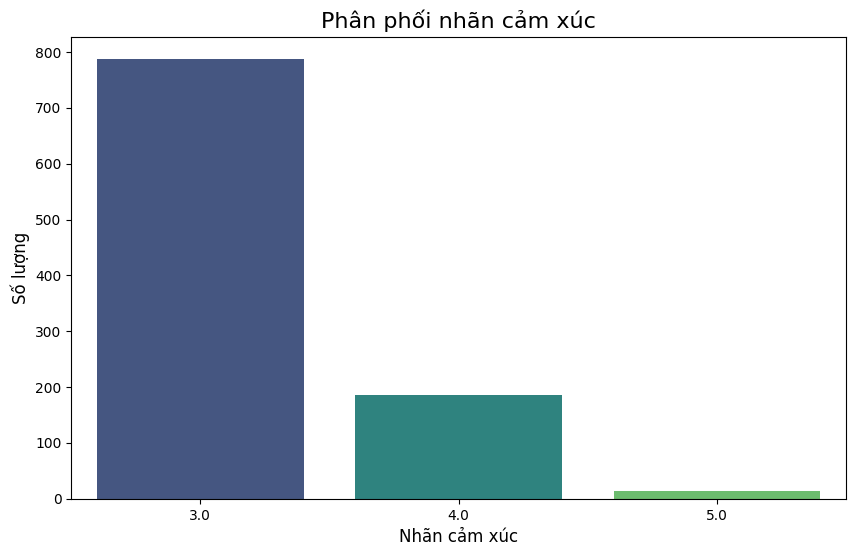

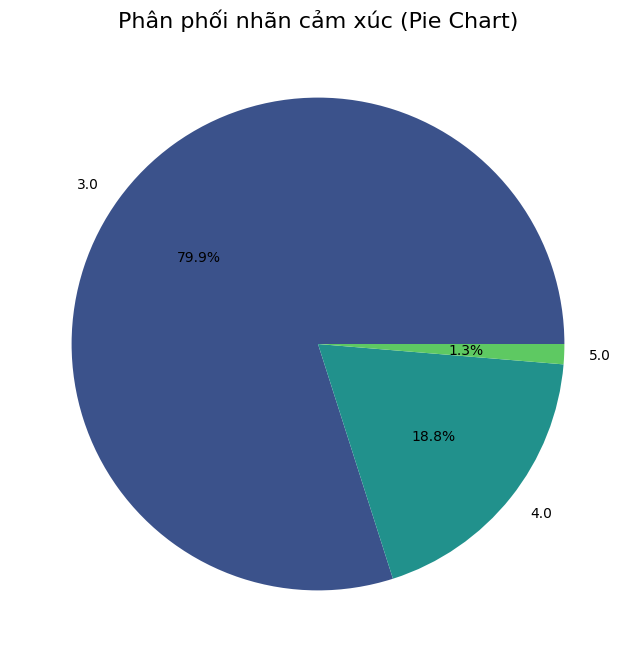

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng mỗi nhãn cảm xúc
label_counts = df_course_score['course_score'].value_counts().sort_index()

# Vẽ biểu đồ cột bằng seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# Thiết lập nhãn và tiêu đề
plt.title("Phân phối nhãn cảm xúc", fontsize=16)
plt.xlabel("Nhãn cảm xúc", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Vẽ biểu đồ tròn (tùy chọn)
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(label_counts)))
plt.title("Phân phối nhãn cảm xúc (Pie Chart)", fontsize=16)
plt.show()

## Lưu bộ dữ liệu kháo học đã gán nhãn

In [15]:
# Chuyển DataFrame về dạng bình thường với reset_index
df2 = df_course_score.reset_index()

# Hiển thị DataFrame kết quả
df2

,course_id,course_score
0,C_1011639,3.0
1,C_1017355,4.0
2,C_1159827,3.0
3,C_1196947,3.0
4,C_1214863,3.0
...,...,...
981,C_948468,3.0
982,C_948486,3.0
983,C_948488,4.0
984,C_949540,3.0


In [16]:
df2.to_csv(f"/kaggle/working/labeled_courses.csv", index=False)